# ROMY - Barometer

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from src.baroarray import baroArray


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in la

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in la

AttributeError: _ARRAY_API not found

In [2]:
# Configuration
config = {

    # time parameters
    # 'tbeg': "2025-01-01 00:00:00",
    # 'tend': "2025-01-02 00:00:00",
    'time_buffer': 3*3600,

    # set data source
    'data_source': 'sds',
    'sds_path': '/home/andbro/freenas/temp_archive/',

    'inventory_path': './metadata/',

    # set verbosity
    'verbose': True,

    # merge nans
    'merge_nans': True,

    # Initialize with station seeds
    'seeds': [
        "BW.PROMY.01.LDI",
        "BW.TON..LDO",
        "BW.BIB..LDO",
        "BW.GRMB..LDO",
        "BW.ALFT..LDO",
        "BW.GELB..LDO",
    ],

    # set reference station
    'reference_station': "BW.PROMY.01.LDI",

    # set sampling rate
    'sampling_rate': 1.0,
}


In [3]:
# Create baroArray object
ba = baroArray(config=config)

# Load data
# ba.load_data(
#     tbeg="2025-02-18 00:00",
#     tend="2025-02-20 00:00",
# )

# Load data
# ba.load_data(
#     tbeg="2025-02-01 00:00",
#     tend="2025-02-03 00:00",
# )

# Load data - good
# ba.load_data(
#     tbeg="2024-03-15 15:00",
#     tend="2024-03-15 18:00",
# )

# Load data
ba.load_data(
    tbeg="2024-03-21 13:00",
    tend="2024-03-21 16:00",
)

# Load data - good
# ba.load_data(
#     tbeg="2024-03-12 12:00",
#     tend="2024-03-12 15:00",
# )

# Load data - 
# ba.load_data(
#     tbeg="2024-03-14 07:30",
#     tend="2024-03-14 10:00",
# )

# Load data - good
# ba.load_data(
#     tbeg="2024-03-24 15:00",
#     tend="2024-03-24 18:00",
# )

# Load data
# ba.load_data(
#     tbeg="2024-08-29 14:00",
#     tend="2024-08-29 18:00",
# )

fmin = 5e-4
fmax = 1e-2

Loaded BW.BIB..LDO from SDS archive
Loaded BW.PROMY.01.LDI from SDS archive
Loaded BW.TON..LDO from SDS archive
Loaded BW.GRMB..LDO from SDS archive
Loaded BW.GELB..LDO from SDS archive
Loaded BW.ALFT..LDO from SDS archive


In [4]:
# from hPa to Pa
ba.scale_data(scale=100)

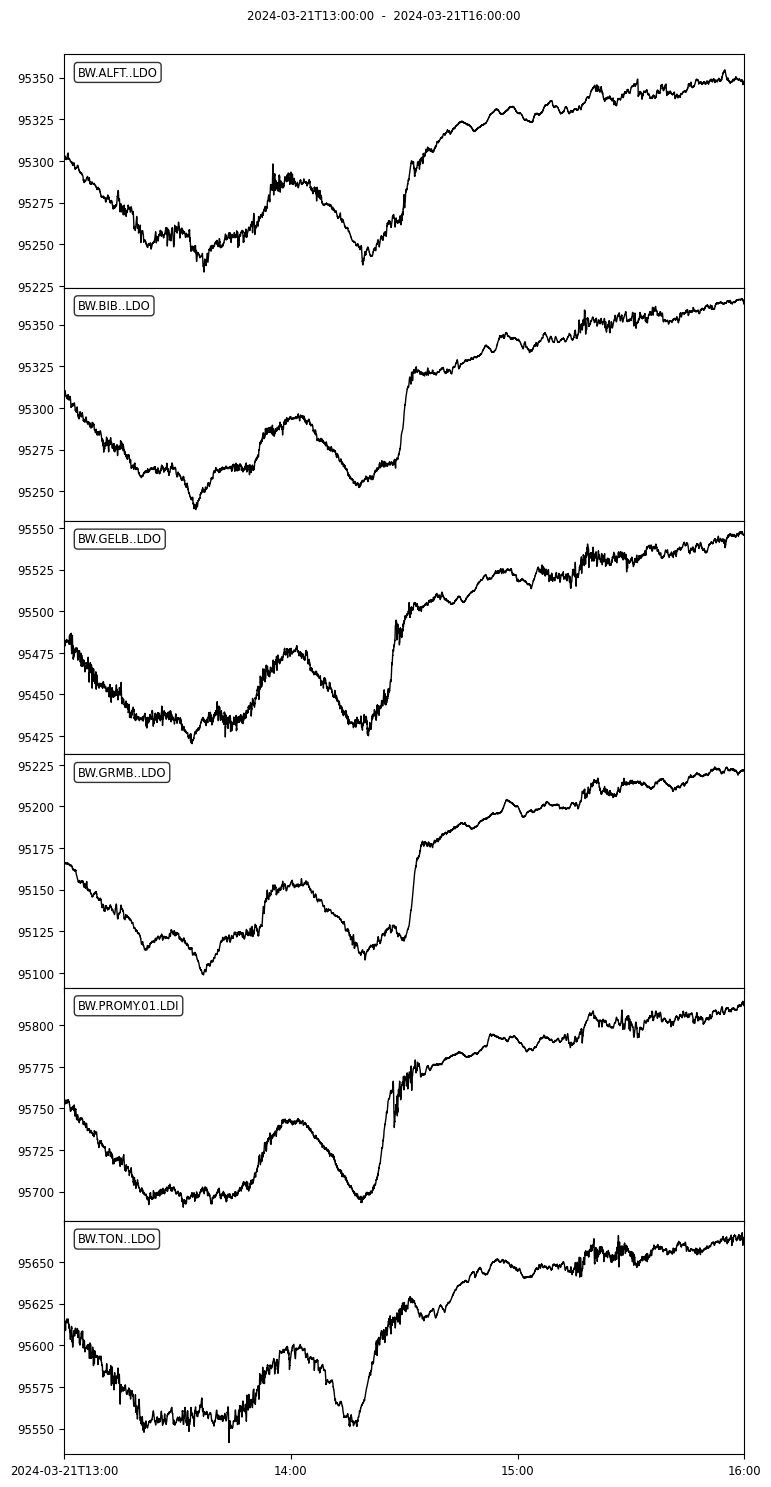

In [5]:
ba.st.plot();

In [6]:
results = ba.compute_station_distances()


Station distances:
BW.TON: 1.57 km
BW.BIB: 2.41 km
BW.GRMB: 2.64 km
BW.ALFT: 2.31 km
BW.GELB: 1.79 km


/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


In [7]:
try:
    # compute coherence
    coherence = ba.compute_coherence(
        window_sec=24*3600,  # 2 hour windows
        overlap=0.5,      # 50% overlap
        smooth_points=50  # Smoothing window
    )

    # plot results
    ba.plot_coherence(
        coherence,
        fmin=fmin,
        fmax=fmax
    )

except Exception as e:
    print(e)
    pass


Window length (86400s) longer than data duration


In [8]:
ba.filter_data(fmin=fmin, fmax=fmax)

Detrending and tapering data...
Applying bandpass filter 0.0005 - 0.01 Hz...


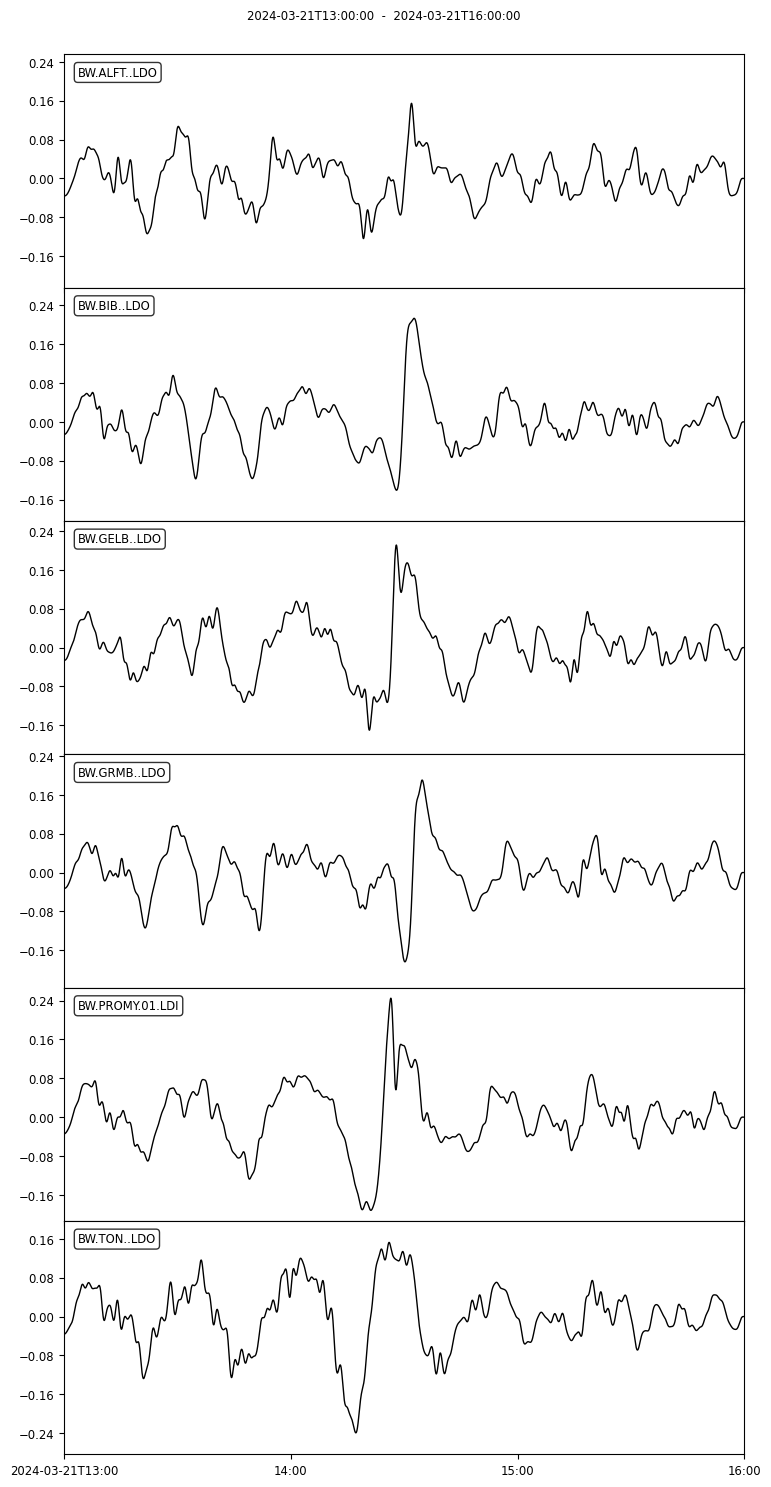

In [9]:
ba.st.plot();

In [10]:
ba.compute_baro_gradient(vp=1., vs=1.*np.sqrt(3), sigmau=1e-9, mode='tilt')

/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)
/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/signal/array_analysis.py:331: UserWarning: Condition number is 69895.75024310936
  warnings.warn(msg)



Computed pressure gradients:
2 Trace(s) in Stream:
BW.PROMY.01.LDN | 2024-03-21T13:00:00.000000Z - 2024-03-21T16:00:00.000000Z | 1.0 Hz, 10801 samples
BW.PROMY.01.LDE | 2024-03-21T13:00:00.000000Z - 2024-03-21T16:00:00.000000Z | 1.0 Hz, 10801 samples


2 Trace(s) in Stream:
BW.PROMY.01.LDN | 2024-03-21T13:00:00.000000Z - 2024-03-21T16:00:00.000000Z | 1.0 Hz, 10801 samples
BW.PROMY.01.LDE | 2024-03-21T13:00:00.000000Z - 2024-03-21T16:00:00.000000Z | 1.0 Hz, 10801 samples

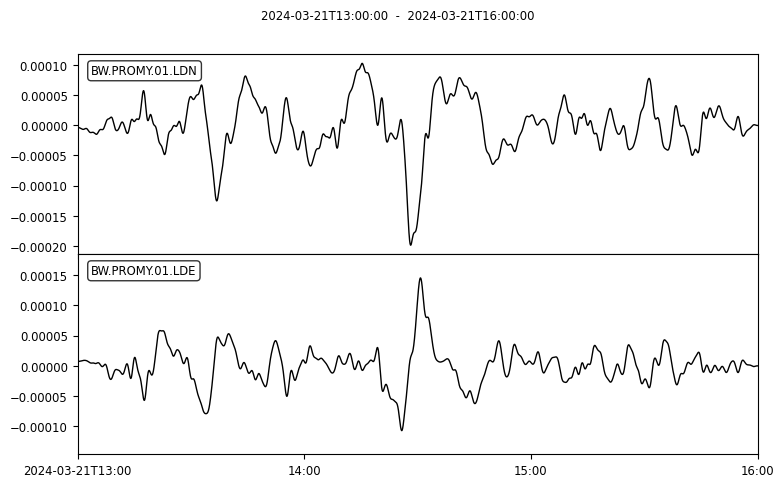

In [11]:
ba.st_grad.plot(equal_scale="False");

In [12]:
ba.config

{'tbeg': 2024-03-21T13:00:00.000000Z,
 'tend': 2024-03-21T16:00:00.000000Z,
 'data_source': 'sds',
 'sds_path': '/home/andbro/freenas/temp_archive/',
 'fdsn_server': 'IRIS',
 'seeds': ['BW.PROMY.01.LDI',
  'BW.TON..LDO',
  'BW.BIB..LDO',
  'BW.GRMB..LDO',
  'BW.ALFT..LDO',
  'BW.GELB..LDO'],
 'reference_station': 'BW.PROMY.01.LDI',
 'fmin': 0.0005,
 'fmax': 0.01,
 'sampling_rate': 1.0,
 'verbose': True,
 'merge_nans': True,
 'inventory': Inventory created at 2026-01-10T15:40:59.892750Z
	Created by: ObsPy 1.4.2
		    https://www.obspy.org
	Sending institution: ObsPy 1.4.2
	Contains:
		Networks (0):

		Stations (0):

		Channels (0):
,
 'time_buffer': 10800,
 'inventory_path': './metadata/',
 't1': 2024-03-21T10:00:00.000000Z,
 't2': 2024-03-21T19:00:00.000000Z,
 'scale': 100,
 'vp': 1.0,
 'vs': np.float64(1.7320508075688772),
 'sigmau': 1e-09}

/home/andbro/cursorfiles/baroseis/src/baroarray.py:991: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


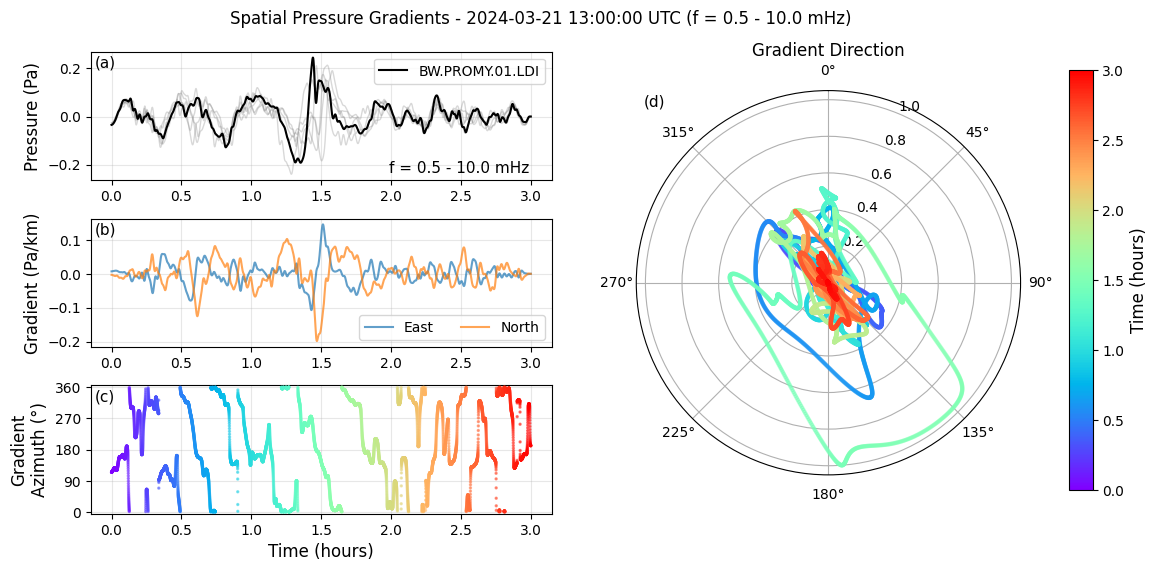

In [13]:
fig = ba.plot_gradient(figsize=(12, 6), out=True, unwrap=False)

fig.savefig(f"./figures/gradient_{ba.config['tbeg'].date.strftime('%Y%m%d')}.png", dpi=150, bbox_inches="tight")

In [14]:
# from obspy import UTCDateTime
# ba.st_grad.trim(UTCDateTime("2024-03-12 00:00"), UTCDateTime("2024-03-13 00:00"))
# ba.st_grad.write("./data/pressure_gradient_20240312.mseed", format="MSEED")

In [15]:
# ba.write_to_sds(ba.st_grad, "./data/")